In [1]:
# 1. Librerías necesarias
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import random
import math

In [2]:
# Cargar el dataset
datos, metadatos = tfds.load("cifar10", as_supervised=True, with_info=True)
datos_entrenamiento, datos_pruebas = datos["train"], datos["test"]
nombres_clases = metadatos.features["label"].names

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/incomplete.LPG8Y4_3.0.2/cifar10-train.tfrecord*...:   0%|         …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/incomplete.LPG8Y4_3.0.2/cifar10-test.tfrecord*...:   0%|          …

Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.


In [3]:
# Preprocesamiento
def normalizar(imagen, etiqueta):
    imagen = tf.cast(imagen, tf.float32) / 255.0
    return imagen, etiqueta

datos_entrenamiento = datos_entrenamiento.map(normalizar).cache().shuffle(50000).batch(32).prefetch(1)
datos_pruebas = datos_pruebas.map(normalizar).cache().batch(32).prefetch(1)

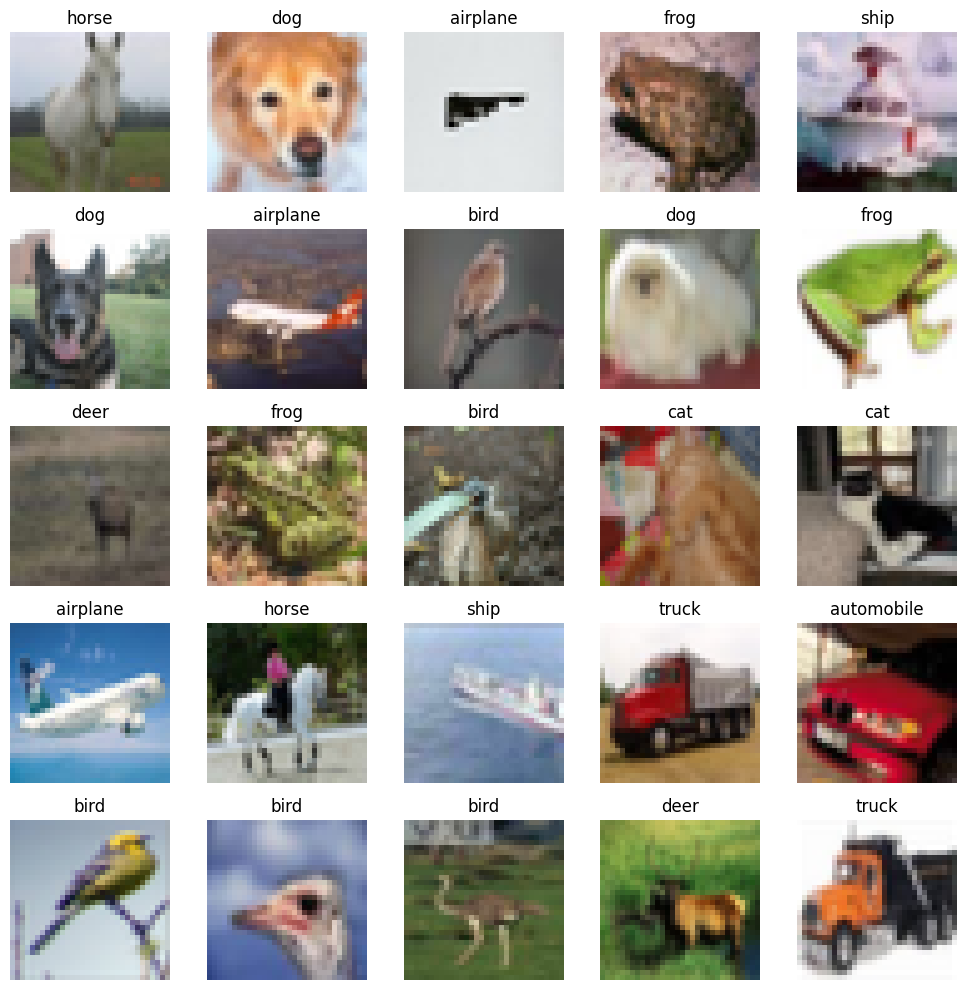

In [4]:
# Visualización de datos
plt.figure(figsize=(10, 10))
for i, (imagen, etiqueta) in enumerate(datos_entrenamiento.unbatch().take(25)):
    plt.subplot(5, 5, i + 1)
    plt.imshow(imagen.numpy())
    plt.title(nombres_clases[etiqueta.numpy()])
    plt.axis("off")
plt.tight_layout()
plt.show()

In [5]:
# Modelo
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(32,32,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

modelo.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Entrenamiento
historial = modelo.fit(datos_entrenamiento, epochs=10, steps_per_epoch=math.ceil(50000/32), validation_data=datos_pruebas)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 50ms/step - accuracy: 0.3514 - loss: 1.7496 - val_accuracy: 0.5584 - val_loss: 1.2260
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 48ms/step - accuracy: 0.5829 - loss: 1.1797 - val_accuracy: 0.6039 - val_loss: 1.1157
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 47ms/step - accuracy: 0.6507 - loss: 0.9931 - val_accuracy: 0.6395 - val_loss: 1.0295
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 48ms/step - accuracy: 0.6970 - loss: 0.8646 - val_accuracy: 0.6864 - val_loss: 0.9258
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 50ms/step - accuracy: 0.7266 - loss: 0.7796 - val_accuracy: 0.6989 - val_loss: 0.8744
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 48ms/step - accuracy: 0.7541 - loss: 0.6995 - val_accuracy: 0.7041 - val_loss: 0.8540
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 48ms/step - accuracy: 0.7769 - loss: 0.6348 - val_accuracy: 0.7202 - val_loss: 0.8379
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 47ms/step - accuracy: 0.7937 -

In [7]:
# Evaluación
loss, accuracy = modelo.evaluate(datos_pruebas)
print(f"Precisión en datos de prueba: {accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.7254 - loss: 0.8622
Precisión en datos de prueba: 0.7228


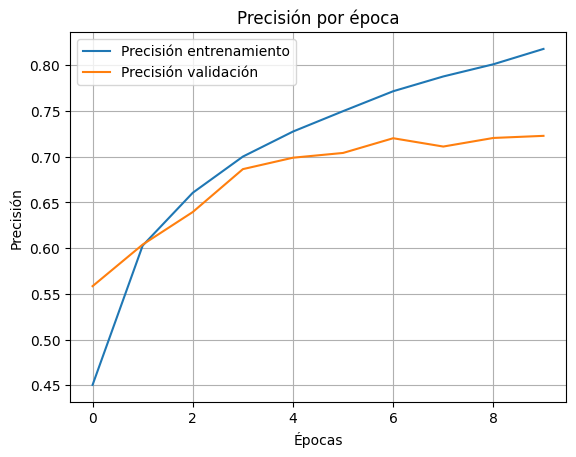

In [8]:
# Gráfica de precisión
plt.plot(historial.history['accuracy'], label='Precisión entrenamiento')
plt.plot(historial.history['val_accuracy'], label='Precisión validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)
plt.title('Precisión por época')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step


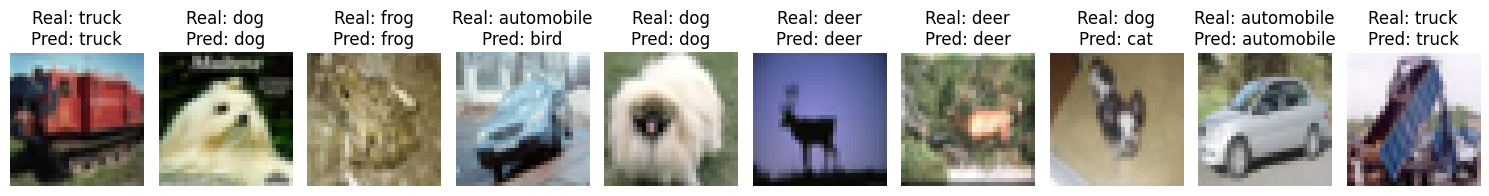

In [9]:
# Predicciones aleatorias
test_images = []
test_labels = []
for img, lbl in datos_pruebas.unbatch().take(1000):
    test_images.append(img.numpy())
    test_labels.append(lbl.numpy())

test_images = np.array(test_images)
test_labels = np.array(test_labels)

num_samples = 10
indices = random.sample(range(len(test_images)), num_samples)
sample_images = test_images[indices]
sample_labels = test_labels[indices]
predictions = modelo.predict(sample_images)
predicted_labels = np.argmax(predictions, axis=1)

plt.figure(figsize=(15, 3))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(sample_images[i])
    plt.title(f'Real: {nombres_clases[sample_labels[i]]}\nPred: {nombres_clases[predicted_labels[i]]}')
    plt.axis('off')
plt.tight_layout()
plt.show()